In [4]:
import os
import glob
import csv
import numpy as np
import matplotlib.pyplot as ppt
%matplotlib inline

AE_BATCH_NAME = 'imagenet-ae-50'
AE_ROOT = '/media/sf_Masterarbeit/data/ILSVRC2012_img_train_AE_50'
SAVE_PATH = '/media/sf_Masterarbeit/master-thesis/report/images/confusion-matrices' + '/' + AE_BATCH_NAME + '.png'

classes = glob.glob(AE_ROOT + '/*_history.csv')
classes = [c.split('/')[-1] for c in classes] # strip path
classes = [c.split('_')[0] for c in classes]

num_classes = len(classes)
confusion_matrix = np.full((num_classes, num_classes), fill_value=-1, dtype=np.float)

# The confusion matrix will contain a row for each origin class, where the column corresponds to the target class
for origin_index, origin_class in enumerate(classes):
    with open(AE_ROOT + '/' + origin_class + '_history.csv') as csv_file:
        csv_reader = csv.reader(csv_file)
        for origin_pic, target_class, confidence, iterations in csv_reader:
            target_index = classes.index(target_class)
            confusion_matrix[origin_index, target_index] = confidence

print('Confusion matrix computed, range: {0} - {1}'.format(np.min(confusion_matrix), np.max(confusion_matrix)))

Confusion matrix computed, range: 2.97109e-08 - 0.999999


In [2]:
import adex.googlenet

CAFFE_ROOT = '/home/chrisbot/Projects/caffe'

labels = adex.googlenet.load_labels(CAFFE_ROOT)
labels_sorted = []
for index, c in enumerate(classes):
    for l in labels:
        if c == l[0].strip():
            labels_sorted.append(l[1])
            break
    else:
        print('{0}:\t##### No name found for: {1} #####'.format(index, c))
        labels_sorted.append('#####NO NAME#####')
print(labels_sorted)

['Afghan hound', 'Siberian husky', 'ping-pong ball', 'lynx', 'groenendael', 'lacewing', 'wooden spoon', 'lorikeet', 'sulphur butterfly', 'assault rifle', 'Appenzeller', 'honeycomb', 'menu', 'Lhasa', 'Crock Pot', 'snail', 'French bulldog', "carpenter's kit", 'water buffalo', 'jaguar', 'purse', 'rapeseed', 'monastery', 'dome', 'conch', 'great grey owl', 'pill bottle', 'medicine chest', 'balloon', 'standard poodle', 'stupa', 'cabbage butterfly', 'abaya', 'obelisk', 'American chameleon', 'bell cote', 'paper towel', 'Irish wolfhound', 'acoustic guitar', 'carbonara', 'file', 'acorn', 'chiffonier', 'rocking chair', 'ballpoint', 'red-breasted merganser', 'Bouvier des Flandres', 'leafhopper', 'cinema', 'sleeping bag']


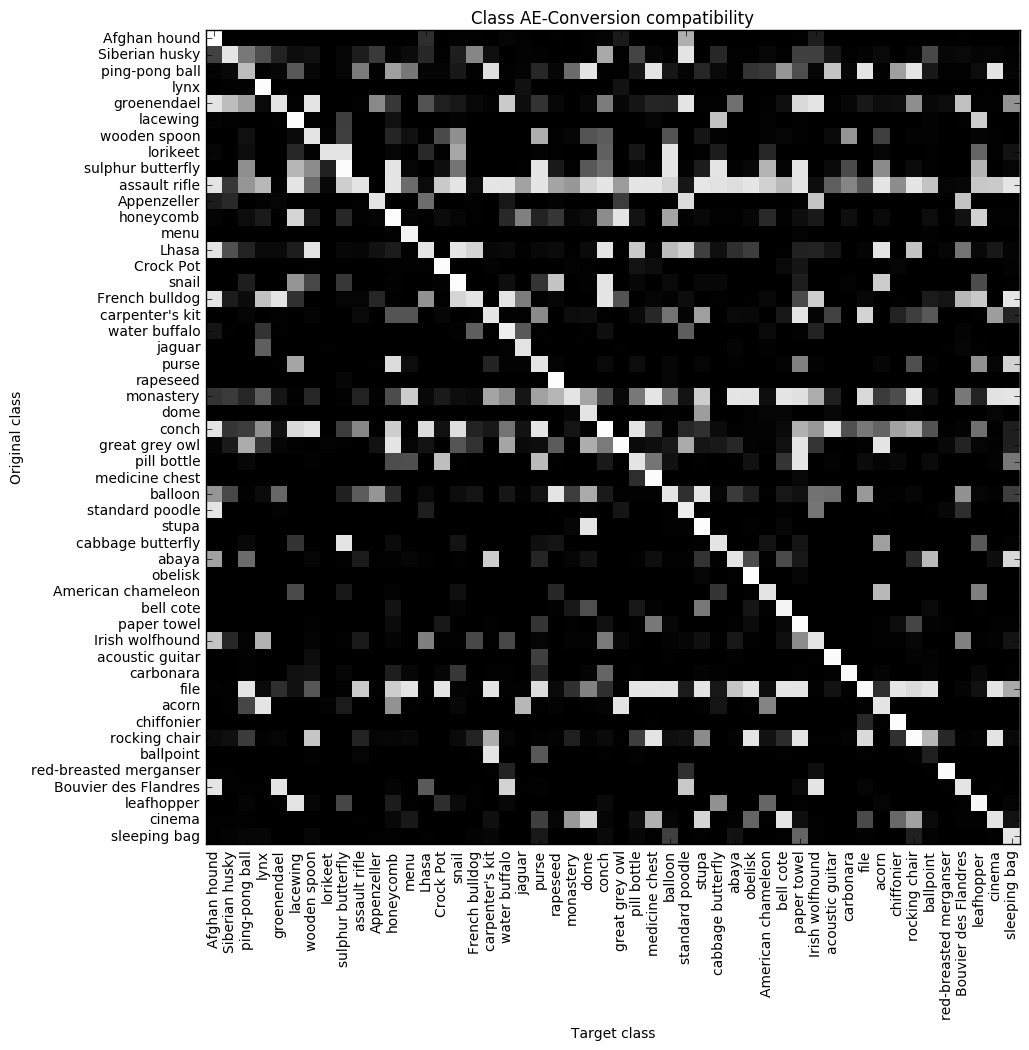

In [3]:
ppt.imshow(confusion_matrix, cmap=ppt.cm.gray, interpolation='none')
ppt.title('Class AE-Conversion compatibility')
ppt.xlabel('Target class')
ppt.ylabel('Original class')
ppt.xticks(np.arange(len(labels_sorted)), labels_sorted, rotation=90)
ppt.yticks(np.arange(len(labels_sorted)), labels_sorted)
fig = ppt.gcf()
fig.set_size_inches(18.5, 10.5)

fig.savefig(SAVE_PATH, bbox_inches='tight')